# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
pp = pprint.PrettyPrinter(indent=4)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

# for i, city in enumerate(cities[:5]):
# used for testing

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # pp.pprint(city_weather)
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | peruibe
Processing Record 3 of Set 1 | hendersonville
Processing Record 4 of Set 1 | kerikeri
Processing Record 5 of Set 1 | 'anah
City not found. Skipping...
Processing Record 6 of Set 1 | businga
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | cox's bazar
Processing Record 9 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 10 of Set 1 | kargasok
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | neiafu
Processing Record 13 of Set 1 | voi
Processing Record 14 of Set 1 | burela de cabo
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | kachug
Processing Record 17 of Set 1 | federal
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | pacasmayo
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | igarka
Processing Record 22 of 

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,53.73,72,97,6.31,AU,1703958313
1,peruibe,-24.3200,-46.9983,74.88,84,100,4.29,BR,1703958313
2,hendersonville,36.3048,-86.6200,39.81,85,100,4.00,US,1703958040
3,kerikeri,-35.2268,173.9474,71.91,92,81,7.61,NZ,1703958315
4,businga,3.3333,20.8833,77.79,47,61,1.79,CD,1703958316


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,72,97,6.31,AU,1703958313
1,peruibe,-24.3200,-46.9983,74.88,84,100,4.29,BR,1703958313
2,hendersonville,36.3048,-86.6200,39.81,85,100,4.00,US,1703958040
3,kerikeri,-35.2268,173.9474,71.91,92,81,7.61,NZ,1703958315
4,businga,3.3333,20.8833,77.79,47,61,1.79,CD,1703958316


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

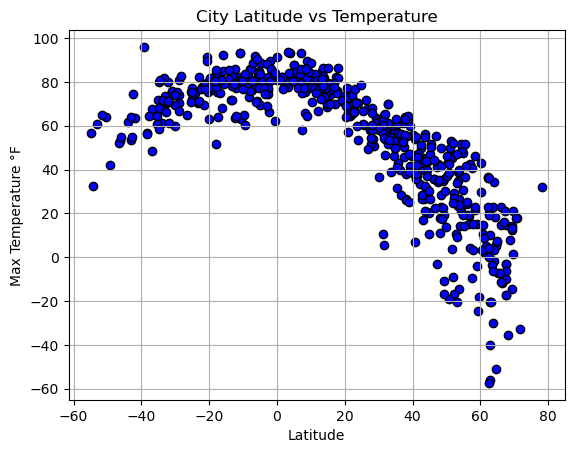

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
date = city_data_df['Date'].min()
plt.title(f"City Latitude vs Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

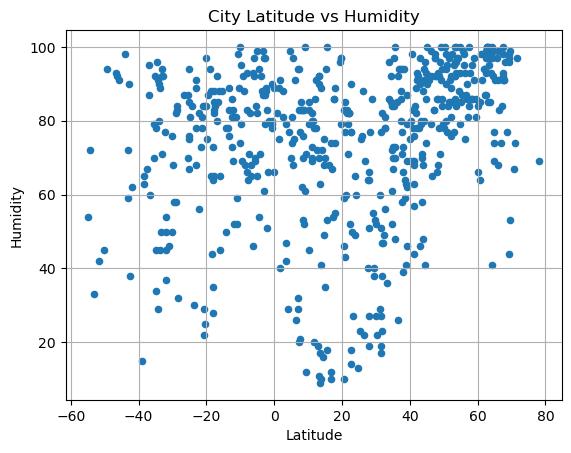

In [40]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True, facecolors='b')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

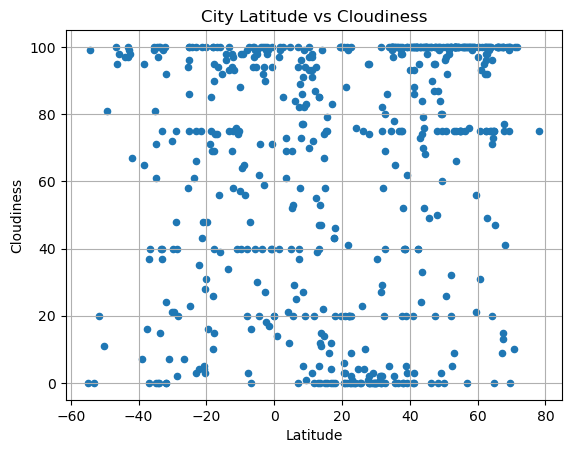

In [41]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True, facecolors='b')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

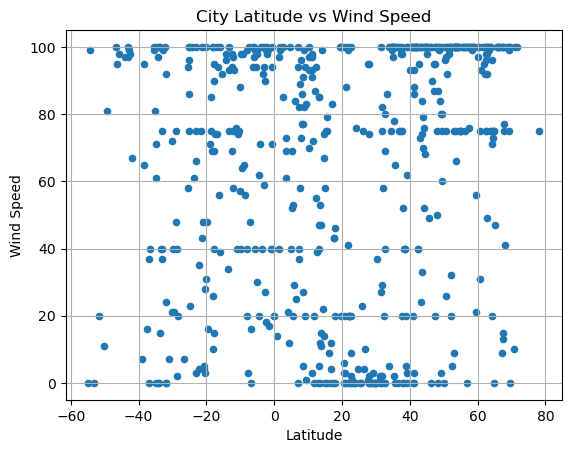

In [42]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True, facecolors='b')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hendersonville,36.3048,-86.6200,39.81,85,100,4.00,US,1703958040
4,businga,3.3333,20.8833,77.79,47,61,1.79,CD,1703958316
5,ribeira grande,38.5167,-28.7000,63.77,59,40,5.01,PT,1703958316
6,cox's bazar,21.4532,91.9798,64.38,83,0,5.73,BD,1703958317
7,kargasok,59.0556,80.8572,14.97,91,100,17.00,RU,1703958318


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,53.73,72,97,6.31,AU,1703958313
1,peruibe,-24.3200,-46.9983,74.88,84,100,4.29,BR,1703958313
3,kerikeri,-35.2268,173.9474,71.91,92,81,7.61,NZ,1703958315
8,grytviken,-54.2811,-36.5092,32.40,72,99,2.15,GS,1703958319
9,neiafu,-18.6500,-173.9833,77.68,88,75,6.91,TO,1703958320


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8675785039218752


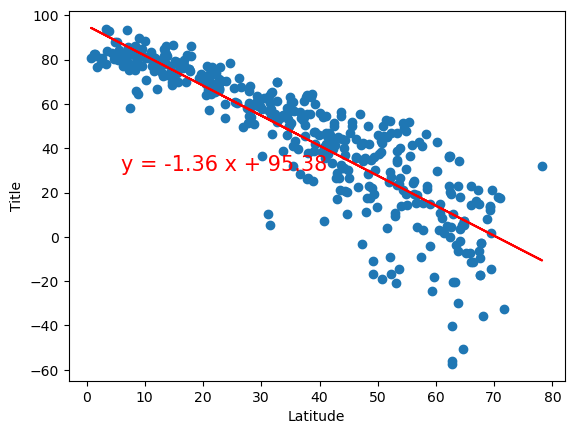

In [46]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))


The r-squared is: 0.6134874867183907


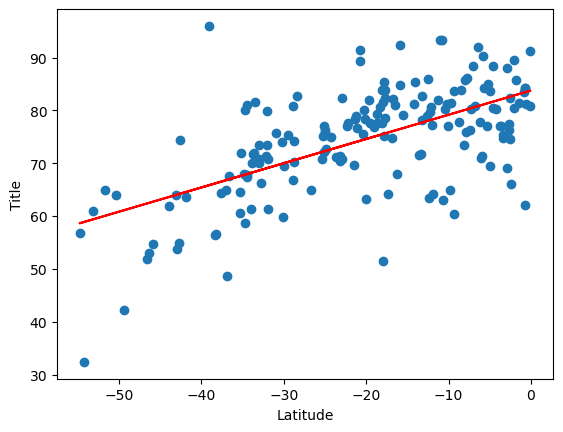

In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** 

The Northern Hemisphere r-squared value suggests a strong negative correlation between temperature and latitude.  This means that as the latitude increases, the temperature will decrease signficantly, and regions closer to the poles are generally colder.  On the Southern Hemisphere, the r-squared value is a positive value indicating a moderate to strong positive correlation, meaning maximum temperatues increases as we approach the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.42805724993208266


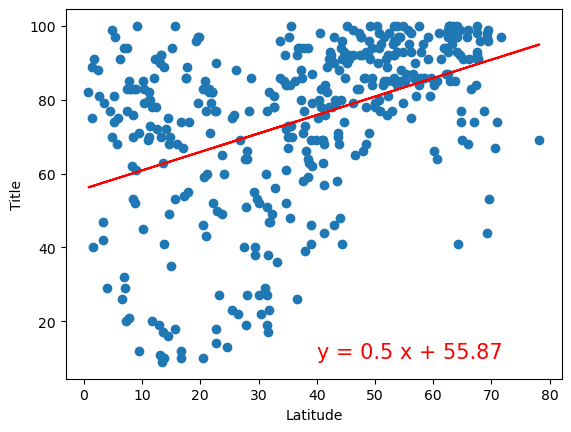

In [48]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.2436531992229736


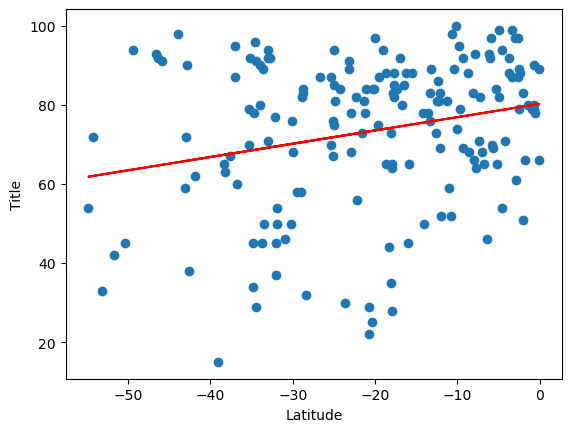

In [49]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** 

The data shows a minimal relationship between latitude and humidity, with a very slight positive correlation in both hemispheres. This suggests that proximity to the equator has negligible impact on humidity levels. The widespread distribution of scatter points indicates a lack of strong or reliable correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3271192824084836


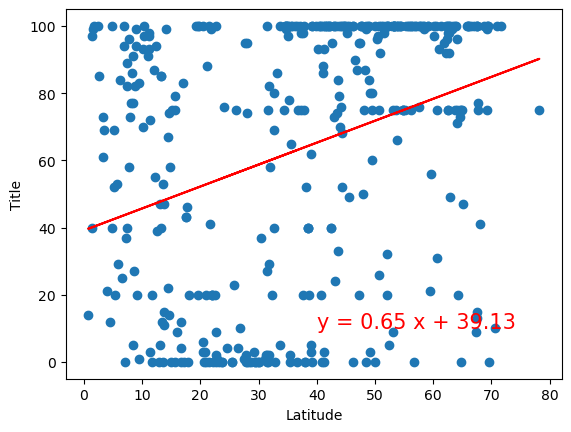

In [50]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.1352260774445775


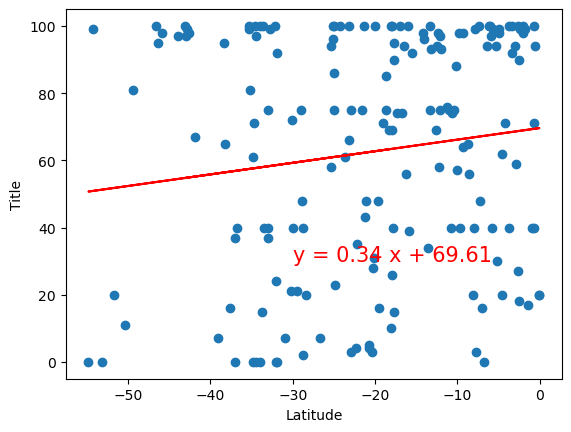

In [51]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** 

There appears to be little to no significant relationship between latitude and cloudiness. Although the linear equations for each hemisphere indicate a positive correlation, they suggest that proximity to the equator does not substantially affect cloudiness levels. The wide spread of scatter points in the data further supports the conclusion that there is no reliable correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.12939199052360081


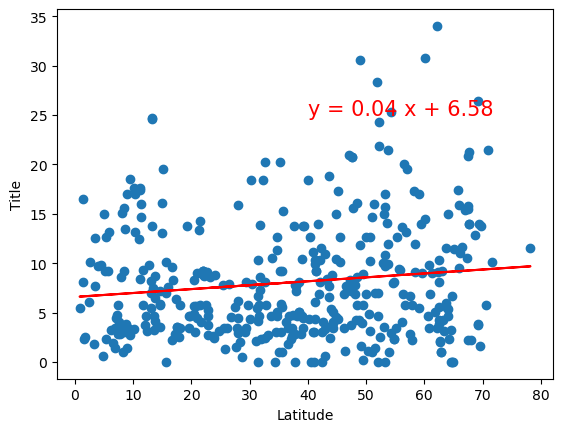

In [52]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.37712404292143265


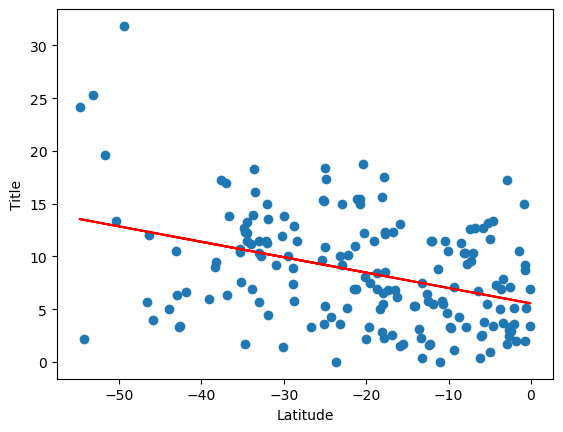

In [53]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

**Discussion about the linear relationship:** 

 There is little to no relationship between latitude and wind speed. The r-values for both hemispheres are low, indicating a lack of significant correlation. Furthermore, the widespread distribution of scatter points in the data suggests that no reliable correlation exists between latitude and wind speed.